# TUD IS sentiment analysis
This notebook contains first expereriments.

## Sentiment Analysis for Tweets from the Twitter-API with the Google Natural Language API

In [1]:
import pandas as pd
from google.cloud import language_v1
from searchtweets import ResultStream, gen_request_parameters, load_credentials, collect_results

### Preparations for Google NLP-API
To authenticate against the Google NLP-API an enviromentvariable `GOOGLE_APPLICATION_CREDENTIALS` pointing to a credentials file must be present in the executing environment

In [2]:
# Instantiates a client
client = language_v1.LanguageServiceClient()

def analyze_tweet_sentiment(tweet):
    document = language_v1.Document(content=tweet['text'], type_=language_v1.Document.Type.PLAIN_TEXT)
    sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment

    return sentiment

### Preparations for Twitter-API

[https://github.com/twitterdev/search-tweets-python/tree/v2](https://github.com/twitterdev/search-tweets-python/tree/v2)

In [3]:
search_args = load_credentials(filename="./credentials/twitter-credentials.yml",
                 yaml_key="search_tweets_v2",
                 env_overwrite=False)

def fetch_tweets(search_term):
    query = gen_request_parameters("{} -is:retweet".format(search_term),
                                   None,
                                   results_per_call=100,
                                   tweet_fields="id,created_at,text,lang")
    tweets = collect_results(query,
                             max_tweets=100,
                             result_stream_args=search_args)
    return tweets[0]['data']

In [4]:
tweets = fetch_tweets('artificial intelligence')

df = pd.DataFrame(columns=['id', 'sentiment_score', 'sentiment_magnitude', 'created_at', 'text', 'lang'])
for tweet in tweets[:10]:
    sentiment = analyze_tweet_sentiment(tweet)
    tweet['sentiment_score'] = sentiment.score
    tweet['sentiment_magnitude'] = sentiment.magnitude

    df = df.append(tweet, ignore_index=True)

df.head()

,id,sentiment_score,sentiment_magnitude,created_at,text,lang
0,1435692509284519936,0.1,1.7,2021-09-08T19:52:22.000Z,Research firm Gartner has identified four tren...,en
1,1435692382100598784,-0.1,0.1,2021-09-08T19:51:52.000Z,used artificial intelligence to solve this pse...,en
2,1435691950561243138,0.0,0.0,2021-09-08T19:50:09.000Z,Cryptoassets and artificial intelligence in EU...,en
3,1435691836291653635,0.0,0.2,2021-09-08T19:49:42.000Z,"Dave Johnson, our chief data and artificial in...",en
4,1435691671203758095,0.0,0.3,2021-09-08T19:49:02.000Z,Will Tesla Be The First to Develop Artificial ...,en


<AxesSubplot:xlabel='created_at'>

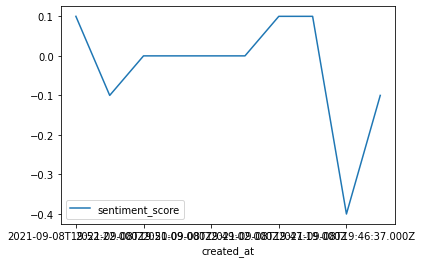

In [5]:
df.plot(x='created_at', y='sentiment_score')